# Main Page #

The main PigmentHunter page allows you to 
* Load and view PDB structures
* Select individual chains for further analysis
* Write a PDB file of your selected chains
* Build an exciton model for the selected pigments
* Build (and launch) Molecular Dynamics (MD) simulations for your selected structure. 

## Loading Structures ##

There are currently two ways to load PDB structures into PigmentHunter. 
* Enter a PDB code into the text box and hit "Fetch". In this case, the PDB file is downloaded directly from rcsb.org.
* Upload a local PDB file from your computer by hitting the "Upload" button and selecting a file. 

If you have previously run an MD simulation on the PigmentHunter interface, you can also load the trajectory or output structure by (a) selecting a run type (pdb2gmx, em, or nvt) from the "pick" dropdown menu and then (b) choosing one of the possible complete runs from the "run:" dropdown menu. 


## Pigment Identification ##

Once a structure loads, PigmentHunter will automatically try to identify Chlorophyll, Bacteriochlorophyll, and Pheophytin pigments of various types from the atoms present in the structure. Identified pigments will be displayed in green in the graphical window with red sticks showing the approximate orientation of the transition dipole moments. At present, PigmentHunter recognizes the following pigment types: 
* Chlorophyll a (CLA)
* Chlorophyll b (CLB)
* Chlorophyll d (CLD)
* Chlorophyll f (CLF)
* Bacteriochlorophyll a (BCA)
* Bacteriochlorophyll b (BCB)
* Bacteriochlorophyll c (BCC)
* Bacteriochlorophyll d (BCD)
* Bacteriochlorophyll e (BCE)
* Bacteriochlorophyll f (BCF)
* Bacteriochlorophyll g (BCG)
* Pheophytin a (PHA)
* Pheophytin b (PHB)
* Bacteriopheophytin a (BPA)

In each case, the abbreviation in parentheses (e.g., CLA) is an internal-standard three-letter code used by PigmentHunter to keep track of different pigment types. PigmentHunter tries to pick the identities of modeled pigments based on the atoms actually present in the PDB structure *not* based on the residue name assigned in the PDB file. (This is because PDB pigment names vary widely from structure to structure, whereas the assigned atom names are fairly well standardized.) 

Keep in mind, however:
1. Very little testing has been done for pigment types other than CLA, CLB, BCA, and PHA. Pigments that appear to be porphyrrins but do not fit into any known type are classified as Unknown (UNK). 

2. Good model parameters are only available for a few of these pigments. Currently, only CLA is fully supported for all types of calculation (TrESP, NSD, and MD). 

In many cases, more than one pigment type is possible since PDB structures are often incomplete. For example, CLA and CLB differ by only one atom (OMC) that CLB contains but CLA does not. If this atom is *not* present for a given pigment, it is impossible to the software to know for sure whether this is a CLA pigment or a CLB that is simply missing its OMC atom. PigmentHunter will always try to choose the simpler option, but this can be changed manually by selecting a different pigment type from the corresponding dropdown list in the PigmentList box. 


## Viewing Structures ##

You can view loaded structures interactively through the embedded NGLView widget. 
* Click and drag to rotate the structure. 
* Click and release on an atom to zoom to that point and ID the atom
* Double click on the background to enter full-screen mode
* Use your mouse scroll wheel to zoom in and out
* Hit the "escape" key to leave full-screen mode

## Selecting Chains ##

Under the "Select" tab, you can select specific chains to be displayed and analyzed. Only the selected chains will be processed for PDB writing, Exciton Modeling, and MD Modeling. 

## Writing PDB Structures ##

You can generate a new PDB file corresponding to your selected subsystem by entering a File Name and clicking "Write" on the Write PDB tab. Clicking the "Download" button will open a file interface where you can select and download the new PDB file. 

## Building Exciton Models ##

In the Exciton Models tab, you can calculate parameters for excitonic simulations, including
* Pigment site energies in file "freqs.txt" (units: 1/cm)
* Frame-by-frame pigment site energies in file "freq_traj.txt" (only for MD trajectories; units: 1/cm)
* Inter-pigment coupling constants stored in the output file "coups.txt" (units: 1/cm)
* Normalized dipole moments in "dips.txt" (unitless: normalized)
* Dipole moment lengths in "diplengths.txt" (units: Debye) 
* Rotation matrix in "rots.txt" (units: Angstrom -- dipole length is normalized)
* Pigment residue names in "names.txt"

### Coupling Models ###

Currently, PigmentHunter supports two different types of coupling model:
* The *Transition ElectroStatic Potential" (TrESP)* method is generally more accurate, when available. In all cases, PigmentHunter uses transition charges that were calculated for the corresponding pigment types in vacuum as described in the publications referenced below. In each case, the transition charges are renormalized to give the "correct" dipole length (reported in the diplengths.txt) for each pigment. The TrESP model is based on the theory and model parameters described in the following publications
    * [Madjet et al. J. Phys. Chem. B, 110, 34, 17268–17281](https://doi.org/10.1021/jp0615398) (Theory + parameters for Bacteriochlorophyll a & Chlorophyll a)
    * [Renger et al. J. Phys. Chem. B 2007, 111, 35, 10487–10501](https://doi.org/10.1021/jp0717241) (Transition charges q10 for chlorophyll b)
    * [Renger, T. Biophysical Journal 2008, 95, 105-119](https://doi.org/10.1529/biophysj.107.123935) (Transition charges for Pheophytin a)
      
* In cases where TrESP parameters are not available (or the necessary atoms are not present in the PDB structure), the point-dipole coupling model (PDC) can be applied instead. This is *much* less accurate than TrESP for closely spaced pigments, but in many systems it may be the only available choice (so far). In this case, the transition dipole is taken to extend directly along the NB-to-ND axis. 


### Site Energy Models ###

Whereas methods for calculating inter-pigment couplings are relatively well-developed, there is much less consensus on the best way to predict pigment *site energies*, i.e., electronic transition frequencies in the absence of inter-pigment coupling. PigmentHunter currently allows three options:
* *Uniform* simply means that all pigments of a given type will be assigned the same transition frequency, hopefully one that corresponds roughly to the transition frequency for that pigment in solution. These are very approximate values, and one should *not* interpret these suggestions literally; in general, pigment site energies depend very strongly on their local environment. 

* *NSD* stands for "Normal‐coordinate structural decomposition", a method for predicting pigment transition frequencies based on the structural deformation of the macrocycle. Our implementation is based on the NSD method of Jentzen et al. and the Chlorophyll site energy model of Zucchelli et al.:
    * Jentzen, Walter; Song, Xing-Zhi; Shelnutt, John A.; [J. Phys. Chem. B, 101, 1684-1699 (1997)](https://doi.org/10.1021/jp963142h)
    * Zucchelli, Giuseppe; Brogioli, Doriano; Casazza, Anna Paola; Garlaschi, Flavio M.; Jennings, Robert C. [Biophys. J., 93, 2240-2254 (2007)](https://doi.org/10.1529/biophysj.107.104554)


* *CDC* stands for "Charge Density Coupling", a simple electrostatic method very much analogous to the TrESP method for inter-pigment couplings. Parameters for our implementation of the CDC method are taken from the same papers cited above for TrESP. The necessary parameters for Chl b were kindly provided to us by personal communication from T. Renger. The CDC method is described in:
    * Adolphs, J., Müh, F., Madjet, M.EA., Renger, T. [Photosynth Res 95, 197 (2008)](https://doi.org/10.1007/s11120-007-9248-z)
    
    
## MD Modeling ##

PigmentHunter can also automatically prepare and run MD simulations for selected structures. However, force field parameters are currently available only for the CLA pigment, using SPC/E water and the OPLS-AA force field of Karki and Roccatano, 
* [J. Chem. Theory Comput. 2011, 7, 4](https://pubs.acs.org/doi/abs/10.1021/ct1004627)

All simulations are run using the GROMACS-2018.4 software package. See [www.gromacs.org/About_Gromacs](https://www.gromacs.org/About_Gromacs) and 
* Abraham, M. J., Murtola, T., Schulz, R., Páll, S., Smith, J. C., Hess, B., Lindahl, E. [SoftwareX 1–2:19–25, 2015](https://doi.org/10.1016/j.softx.2015.06.001)

The process by which protein structures are prepared for MD simulations is complicated and a bit difficult to explain. Most parts of the process are represented and described graphically in the PigmentHunter interface. For complete details (including full GROMACS output), please check the **logfile.txt** file located in the relevant simulation directory. Barring programming errors, this should include a *complete* record of everything that has been done to the structure in order to prepare it for MD simulation. 

## CD Spectroscopy Calculations ##

The central quantity required for calculating CD spectra is a "rotation matrix", which appears to have two different sign conventions in the literature. Prior to 12/16/2021, PigmentHunter used the convention reported, e.g., in [this paper](https://aip.scitation.org/doi/10.1063/1.1470200):

* Thomas Renger and R. A. Marcus , "On the relation of protein dynamics and exciton relaxation in pigment–protein complexes: An estimation of the spectral density and a theory for the calculation of optical spectra", J. Chem. Phys. 116, 9997-10019 (2002) https://doi.org/10.1063/1.1470200

After 12/16/2021, the app uses the sign convention reported, e.g., [here](https://link.springer.com/article/10.1023/A:1014947732165):

* Wendling, M., Przyjalgowski, M.A., Gülen, D. et al. The quantitative relationship between structure and polarized spectroscopy in the FMO complex of Prosthecochloris aestuarii: refining experiments and simulations. Photosynthesis Research 71, 99–123 (2002). https://doi.org/10.1023/A:1014947732165

This change **does result in a sign-flip** of the CD spectrum calculated by PigmentHunter. The convention as of 12/16/2021 matches the sign of the calculated CD spectrum reported for the FMO protein by Wendling et al., when the 4BCL monomeric FMO structure is used as the input, with site energies and FWHM taken from Wendling et al. (See Figure 10B of that paper). Note that the pigment numbering in the 4BCL structure is different from that of Wendling et al.:


| Wendling #: | 1     |  2    |   3   |   4   |   5   |   6   |   7   | 
| -------     | ---   | ---   | ---   | ---   | ---   | ---   | ---   |
| 4BCL #:     | 367   | 372   | 371   | 369   | 373   | 368   | 370   |
| 3ENI #:     | 359   | 364   | 362   | 365   | 361   | 360   | 363   |
| Site Energy (cm$^{-1}$) | 12350 | 12465 | 12160 | 12350 | 12600 | 12480 | 12460 |

For quantitative comparison of simulated spectra, this difference in pigment numbering must be accounted for when assigning site energies. 

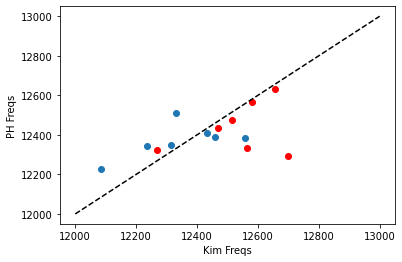

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 367 372 371 369 373 368 370
# 359 364 362 365 361 360 363
kFreqs = np.array([14830.4, 15058.8, 14585.3, 14736.3, 14959.2, 14932.0, 14815.3])-2500
wFreqs = np.array([12350, 12465, 12160, 12350, 12600, 12480, 12460])
rFreqs = np.array([5, -180, -380, -85, 50, -70, -135.0]) + 12650

N4bcl = np.array([351, 356, 355, 353, 357, 352, 354])
np.argsort(N3eni)

f4bcl = np.loadtxt('../data/exc/4BCL.exc/freqs.txt')#[N4bcl-np.min(N4bcl)]
fnvt = np.loadtxt('../data/exc/3ENI-nvt.exc/freqs.txt')
fem = np.loadtxt('../data/exc/3ENI-em.exc/freqs.txt')
fpdb2gmx = np.loadtxt('../data/exc/3ENI-pdb2gmx.exc/freqs.txt')

plt.plot(kFreqs, f3eni, 'o')
plt.plot(rFreqs, f4bcl, 'ro')
plt.xlabel('Kim Freqs')
plt.ylabel('PH Freqs')
# plt.plot(rFreqs, f3eni, 'o')
plt.plot([12000, 13000], [12000, 13000], 'k--')

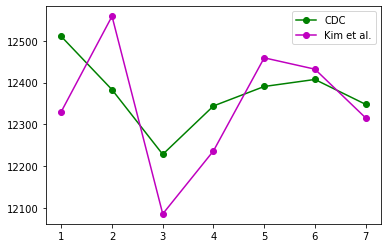

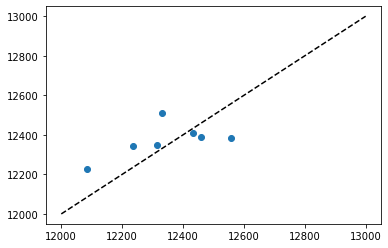

In [50]:
# plt.plot(np.arange(1, 8), f4bcl[N4bcl-np.min(N4bcl)], '-o')
plt.plot(np.arange(1, 8), fnvt, '-og', label='CDC')
# plt.plot(np.arange(1, 8), fem, '-ob')
# plt.plot(np.arange(1, 8), fpdb2gmx, '-or')
plt.plot(np.arange(1, 8), kFreqs, 'm-o', label='Kim et al.')
plt.legend()
plt.show()

plt.plot(kFreqs, fnvt, 'o')
plt.plot([12000, 13000], [12000, 13000], 'k--')
plt.show()